In [32]:
! pip install nltk

In [33]:
import nltk
import string
import matplotlib.pyplot as plt

nltk.download("punkt")
nltk.download("stopwords")

from nltk import word_tokenize
from nltk.probability import FreqDist

       

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bipva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bipva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#sample text
text = "This is my test text. We're keeping this text short to keep things manageable."
text = text.lower() 
print(text)

this is my test text. we're keeping this text short to keep things manageable.


In [5]:
#Reading text from a file in python
def read_book(title):  #read a book and return it as a string 
    with open(title, "r", encoding ="utf8") as current_file: 
        text = current_file.read() 
        text = text.replace("\n", "").replace("\r", "") 
    return text 

In [13]:
text = read_book("RomeoAndJuliet.txt")
text = text.lower()

In [14]:
print(text)

﻿the project gutenberg ebook of romeo and juliet, by william shakespearethis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever.  you may copy it, give it away orre-use it under the terms of the project gutenberg license includedwith this ebook or online at www.gutenberg.org/licensetitle: romeo and julietauthor: william shakespeareposting date: may 25, 2012 [ebook #1112]release date: november, 1997  [etext #1112]language: english*** start of this project gutenberg ebook romeo and juliet ****project gutenberg is proud to cooperate with the world library*in the presentation of the complete works of william shakespearefor your reading for education and entertainment.  however, thisis neither shareware nor public domain. . .and under the libraryof the future conditions of this presentation. . .no charges maybe made for *any* access to this material.  you are encouraged!!to give it away to anyone you like, but no charges are allowed!!the complete wo

In [15]:
# traverse the given string and if any punctuation marks occur replace it with null 
for x in string.punctuation: 
  text = text.replace(x, " ") 
# Print string without punctuation 
print("\n AFTER REMOVING PUNCTUATIONS:\n")
print(text)



 AFTER REMOVING PUNCTUATIONS:

﻿the project gutenberg ebook of romeo and juliet  by william shakespearethis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever   you may copy it  give it away orre use it under the terms of the project gutenberg license includedwith this ebook or online at www gutenberg org licensetitle  romeo and julietauthor  william shakespeareposting date  may 25  2012  ebook  1112 release date  november  1997   etext  1112 language  english    start of this project gutenberg ebook romeo and juliet     project gutenberg is proud to cooperate with the world library in the presentation of the complete works of william shakespearefor your reading for education and entertainment   however  thisis neither shareware nor public domain     and under the libraryof the future conditions of this presentation     no charges maybe made for  any  access to this material   you are encouraged  to give it away to anyone you like  but no char

In [16]:

# Count the number of words after removing punctuations
print(len(text))

169275


In [17]:
# BREAK THE STRING INTO TOKENS
token = word_tokenize(text.lower())

In [18]:
from nltk.corpus import stopwords
a = set(stopwords.words("english"))

#print(" The token form of the text is:\n", token)
no_stopwords = [x for x in token if x not in a] # for each x in text1, if x is not in a then, add it to the list" 
print("After removing the stop words:\n", no_stopwords)


After removing the stop words:
 ['\ufeffthe', 'project', 'gutenberg', 'ebook', 'romeo', 'juliet', 'william', 'shakespearethis', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'withalmost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'orre', 'use', 'terms', 'project', 'gutenberg', 'license', 'includedwith', 'ebook', 'online', 'www', 'gutenberg', 'org', 'licensetitle', 'romeo', 'julietauthor', 'william', 'shakespeareposting', 'date', 'may', '25', '2012', 'ebook', '1112', 'release', 'date', 'november', '1997', 'etext', '1112', 'language', 'english', 'start', 'project', 'gutenberg', 'ebook', 'romeo', 'juliet', 'project', 'gutenberg', 'proud', 'cooperate', 'world', 'library', 'presentation', 'complete', 'works', 'william', 'shakespearefor', 'reading', 'education', 'entertainment', 'however', 'thisis', 'neither', 'shareware', 'public', 'domain', 'libraryof', 'future', 'conditions', 'presentation', 'charges', 'maybe', 'made', 'access', 'material', 'encouraged', 'give', 'away',

In [19]:
len(no_stopwords)

16149

In [20]:
# find the frequency of tokens
fdist = FreqDist(no_stopwords) 

# Find the top 10 words by frequency
print("TOP 10 WORDS")
fdist1 = fdist.most_common(10)
print(fdist1)

# segregate the above list in 2 lists, words and its frequency
x,y = [[ i for i, j in fdist1 ], 
       [ j for i, j in fdist1 ]]
print(x)
print(y)

TOP 10 WORDS
[('thou', 278), ('thy', 164), ('rom', 163), ('romeo', 162), ('love', 151), ('nurse', 150), ('thee', 138), ('jul', 117), ('shall', 112), ('come', 99)]
['thou', 'thy', 'rom', 'romeo', 'love', 'nurse', 'thee', 'jul', 'shall', 'come']
[278, 164, 163, 162, 151, 150, 138, 117, 112, 99]


<BarContainer object of 10 artists>

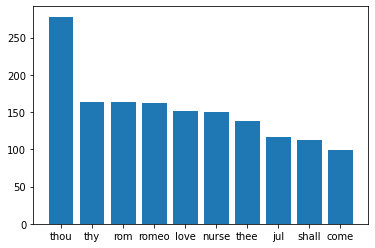

In [34]:
plt.bar(x,y)
 

## Total Unique words
* Design function called word_stats(), which will take the word frequency dictionary( output of count_words_fast():count_words() ) as a parameter.
* The function will return the total no of unique words and a dict_values holding total count of them together, as a tuple.

In [38]:
# find the frequency of tokens
fdist = FreqDist(token) 

# Find the top 10 words by frequency
print("TOP 10 WORDS")
fdist1 = fdist.most_common(10)
print(fdist1)

# segregate the above list in 2 lists, words and its frequency
x,y = [[ i for i, j in fdist1 ], 
       [ j for i, j in fdist1 ]]
print(x)
print(y)

TOP 10 WORDS
[('the', 844), ('and', 791), ('i', 658), ('to', 652), ('of', 527), ('a', 522), ('in', 376), ('is', 375), ('that', 370), ('you', 364)]
['the', 'and', 'i', 'to', 'of', 'a', 'in', 'is', 'that', 'you']
[844, 791, 658, 652, 527, 522, 376, 375, 370, 364]


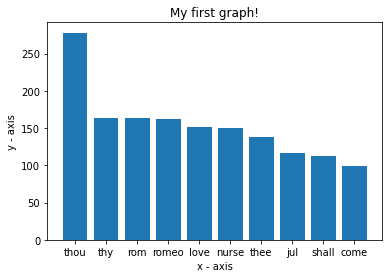

In [25]:
# plotting the points  
plt.bar(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.savefig("plot.png")

In [8]:
! pip install wordcloud

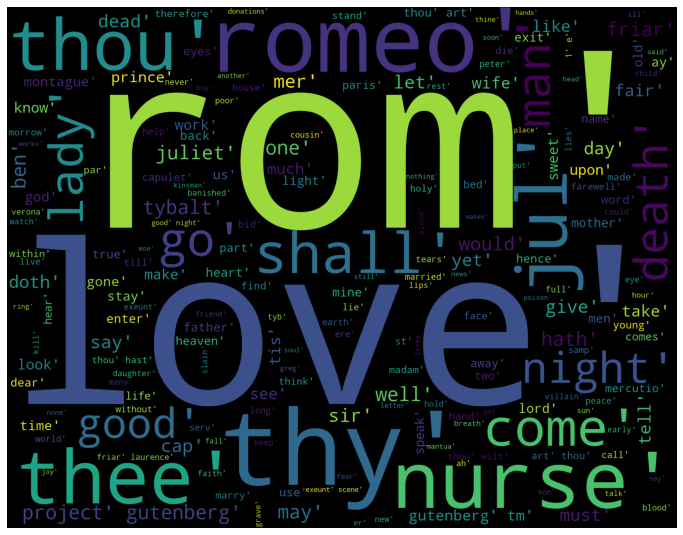

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

width = 12
height = 12
plt.figure(figsize=(width, height))
#text = 'all your base are belong to us all of your base base base'
wordcloud = WordCloud(width=1800,height=1400).generate(str(no_stopwords))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()